# K-Nearest Neighbor (k-NN) Classification

K-Nearest Neighbors is an example of **instance-based learning** where we simply store the training data and use it to make new predictions.

Instance-based techniques are  **lazy**, compared to model-based techniques which are **eager**. 

In an **instance-based** approach, we learn from the data when we make a new query, hence the training is fast, but the preditions are slow. In an **model-based** apporach, we learn from the data right away and build a generalized model capable of predicting any value, hence the training is slow but the predictions are fast.

### Instance-based learning techniques

_Source_: [K-nearest neighbors](https://www.jeremyjordan.me/k-nearest-neighbors/)

Store the **input data**, features and targets:

$$
\begin{bmatrix}x_{11} & \cdots & x_{1n} \\ \vdots & & \vdots \\ x_{m1} & \cdots & x_{mn} \end{bmatrix} \; \text{and} \; \begin{bmatrix}y_1 \\ \vdots \\ y_m \end{bmatrix}
$$

When asked to predict a new value for a **given instance** $x_{test}$

$$
y_{test} = \; ?
$$

we search via a **distance metric** for $k$ nearest **similar data points** previously stored, e.g.:

$$
\begin{bmatrix}x_{41} & \cdots & x_{4n} \\ x_{51} & \cdots & x_{5n} \\ x_{91} & \cdots & x_{9n} \end{bmatrix} \; \text{and} \; \begin{bmatrix}y_4 \\ y_5 \\ y_9 \end{bmatrix}
$$

and use them to generate a **prediction** using a **weight** method like e.g.

$$
y_{test} = \frac{y_4 + y_5 + y_9}{k}
$$

used in k-nearest neighbor **regression**.

### Model-based learning techniques

Use the **input data**, features and targets:

$$
\begin{bmatrix}x_{11} & \cdots & x_{1n} \\ \vdots & & \vdots \\ x_{m1} & \cdots & x_{mn} \end{bmatrix} \; \text{and} \; \begin{bmatrix}y_1 \\ \vdots \\ y_m \end{bmatrix}
$$

To learn a set of parameters

$$
\begin{bmatrix}\theta_1, \theta_2, \cdots, \theta_n \end{bmatrix}
$$

we yield a **generalized function**

$$
f(x) = \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

which is capable of predicting values or classes on **new input data**, e.g.

$$
f(x_i) = 42
$$

## The k-NN Classifier Algorithm

Given a trainig set $X_{train}$ with labels $y_{train}$, and given a new instance $x_{test}$ to be classified, then

1. find the $k$ most similar instances (let's call them $X_{NN}$) to $x_{test}$ that are in $X_{train}$ using e.g. eucledian **distance metric**
2. get the labels $y_{NN}$ for the instances in $X_{NN}$
3. predict the label for $x_{test}$ by combining the labels $y_{NN}$ e.g. with **simple majority vote**

## Example with SciKit-Learn

Given this [random 2-class classification data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html):

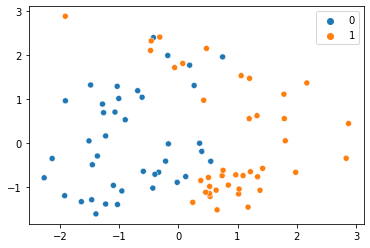

In [1]:
import numpy as np
np.random.seed(31415)
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train);

### Train the model

We train the model for different number of neighbors $k$.

A common rule of thumb is that $k = \sqrt{n}$ where $n$ is the **number of samples** in your training set, seems often perform well.

In [2]:
np.sqrt(X_train.shape[0]).astype(int)

8

For classification we use the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

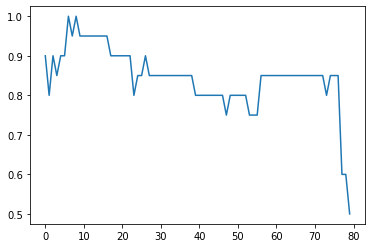

In [3]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
best_k = 0
for k in np.arange(1, len(X_train)+1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
    if accuracy >= np.max(accuracies):
        best_k = k

sns.lineplot(data=accuracies);

In [4]:
print(f'best accuracy is for k={best_k}')

best accuracy is for k=9


In [5]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
print(f'score: {model.score(X_test, y_test)}')

score: 1.0


### Hypertuning Model Parameters

In [6]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params = {
    'n_neighbors': np.arange(1, 40),
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 5, 10, 15],
    'p': [1, 2]
}

grid = GridSearchCV(knn, params, cv=7)
grid.fit(X, y)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 5, 10, 15],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [7]:
grid.best_params_

{'leaf_size': 1, 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

In [8]:
grid.best_score_

0.9408163265306122

In [9]:
grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, weights='distance')

In [10]:
import pandas as pd
result = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000783,0.000088,0.002172,0.000982,1,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.800000,0.866667,0.928571,0.857143,0.928571,1.0,1.0,0.911565,0.069328,57
1,0.000862,0.000206,0.001483,0.000453,1,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.800000,0.866667,0.928571,0.857143,0.928571,1.0,1.0,0.911565,0.069328,57
2,0.000756,0.000243,0.001559,0.000239,1,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.800000,0.933333,0.928571,0.857143,0.928571,1.0,1.0,0.921088,0.067047,13
3,0.000703,0.000087,0.001038,0.000064,1,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.800000,0.933333,0.928571,0.857143,0.928571,1.0,1.0,0.921088,0.067047,13
4,0.000563,0.000034,0.001224,0.000085,1,2,1,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.733333,0.733333,0.928571,0.857143,0.857143,1.0,1.0,0.872789,0.103415,269


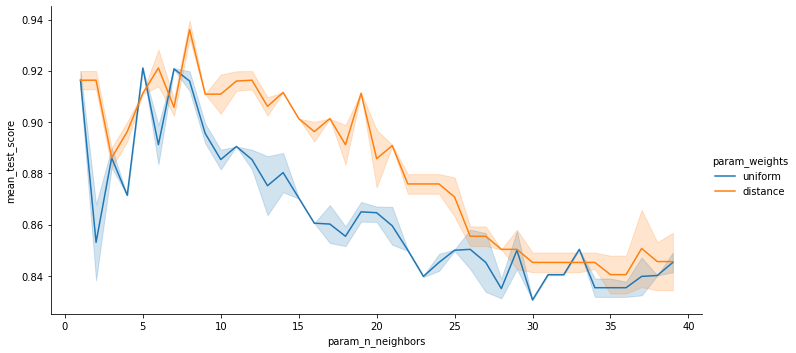

In [11]:
sns.relplot(
    data=result,
    kind='line',
    x='param_n_neighbors',
    y='mean_test_score',
    hue='param_weights',
    height=5,
    aspect=2
);

#### Classification Report

In [14]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### Confusion Matrix

[[10  0]
 [ 0 10]]


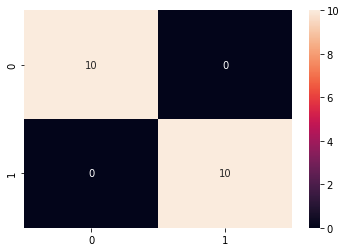

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True);

### Plotting the Decision Boundary

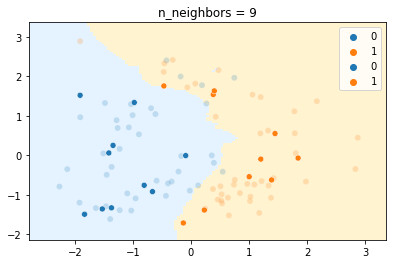

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def plot_knn_decision_boundary(model, X, y, X_, y_):
    cmap = ListedColormap(['#74c1ff30', '#ffc10730'])
    mesh_step_size = 0.05
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6.4, 4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='auto')
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, alpha=0.2)        # training data
    sns.scatterplot(x=X_[:,0], y=X_[:,1], hue=y_)                # test data
    plt.title("n_neighbors = {}".format(model.n_neighbors))
    plt.show()

plot_knn_decision_boundary(model, X_train, y_train, X_test, y_test);

### Vary k-Value and Weight

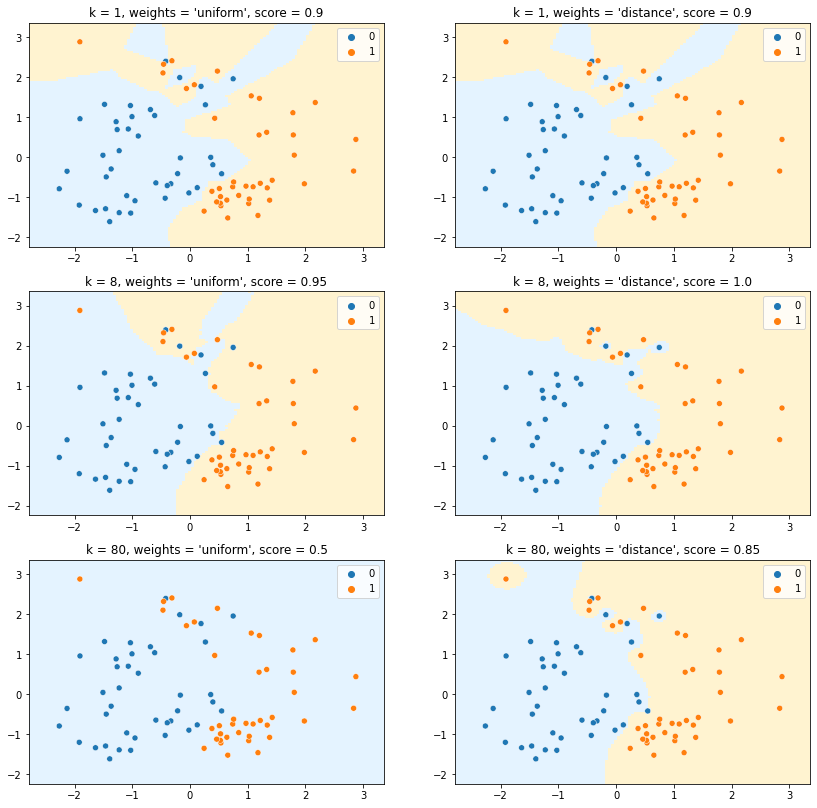

In [20]:
n = X_train.shape[0]

params = [
    {'weights': 'uniform', 'n_neighbors': 1},
    {'weights': 'distance', 'n_neighbors': 1},
    {'weights': 'uniform', 'n_neighbors': np.sqrt(n).astype(int)},
    {'weights': 'distance', 'n_neighbors': np.sqrt(n).astype(int)},
    {'weights': 'uniform', 'n_neighbors': n},
    {'weights': 'distance', 'n_neighbors': n}]

cmap = ListedColormap(['#74c1ff30', '#ffc10730'])
mesh_step_size = 0.05
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

plt.figure(figsize=(14, 14))

for i, param in enumerate(params):
    model = KNeighborsClassifier(**params[i])
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 2, i + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap, shading='auto')
    sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train)
    plt.title(f"k = {model.n_neighbors}, weights = '{model.weights}', score = {model.score(X_test, y_test)}")


# K-Means Clustering

TODO https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html